<a href="https://colab.research.google.com/github/christophersingh/Airtime/blob/main/Airtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./room_entries.csv', sep=',')

In [2]:
df.isna().sum()

timestamp    0
user         0
room         0
room_name    0
dtype: int64

In [3]:
df.isna().any().any()

False

In [4]:
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

df['datetime'] = df.apply(lambda x: datetime.fromtimestamp(x['timestamp']), axis = 1)
df['date'] = df.apply(lambda x: date.fromtimestamp(x['timestamp']), axis = 1)
df['hour'] = df['datetime'].dt.hour
#df['login_date'] = pd.to_datetime(df['login_date'])

df['day_of_week'] = df['datetime'].dt.day_name()
df

,timestamp,user,room,room_name,datetime,date,hour,day_of_week
0,1517115600,4f1897100d843738adf0f86c0510cffe,d4aaab942cbbe0e5b7726c6107f11608,Aubrielle's Kansas City Royals Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
1,1517115600,9fce3905a9bd5cd02297092a2f3894e8,ebe5843f5d3d9d23dc3024cc3e6188f5,Jude's Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
2,1517115601,c8adb30f27f1f2c1638c6b2f1075b344,210d8d1b60ae0d76c8740ebdda1f0375,Walter's Indianapolis Colts Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
3,1517115601,c0394190e82e6ef469bc1bf896d780bb,3c2cd82f285b0f1d33307d9dd72511d1,Ezekiel's Finding Nemo Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
4,1517115601,a7afb0757f3d05a844d2840927ba3d86,98dbfe778189fd55c116aa9b91166f57,Jude's St. Louis Cardinals Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
...,...,...,...,...,...,...,...,...
274631,1517201997,9ee5642149dad30714a2936a335347b4,be52264bfbbbccb1094228d46e85e298,Azalea's Room,2018-01-29 04:59:57,2018-01-29,4,Monday
274632,1517201998,aeef8bbe3ba1939905c11429d81f713a,b13fead476eed42d21e4cd35d94ee1d8,Ezekiel's Shrek 2 Room,2018-01-29 04:59:58,2018-01-29,4,Monday
274633,1517201999,8a0d85f8d46199d04d42816875490d41,d8862f247c074379d999da281479e468,Hudson's Furious 7 Room,2018-01-29 04:59:59,2018-01-29,4,Monday
274634,1517201999,de08e88a5e710b38fdf382cd585c64e8,489e238b119b7e8d804380fb8cc36d88,Esther's Room,2018-01-29 04:59:59,2018-01-29,4,Monday


In [5]:
most_distinct_people = pd.DataFrame(df.groupby('room_name')['user'].nunique().sort_values(ascending=False))
most_distinct_people.head(15)   

,user
room_name,
Emilio's Room,1017
Azalea's Room,993
Frida's Room,963
Karter's Room,953
Case's Room,946
Damian's Room,945
Walter's Room,945
Alma's Room,927
Deandre's Room,924


In [6]:
df[df['room_name'] == 'Emilio\'s Room']

,timestamp,user,room,room_name,datetime,date,hour,day_of_week
36,1517115613,f5e74e27774a48e36d0bdf412b5f7811,16ccdbfd12cc6cf71e2a20c1afb4f137,Emilio's Room,2018-01-28 05:00:13,2018-01-28,5,Sunday
43,1517115615,e848326d291a00b3e64501cd359780f5,3b66c607487093e06e1c600e8f9ffae2,Emilio's Room,2018-01-28 05:00:15,2018-01-28,5,Sunday
49,1517115617,f967160b69b32edf4336e7477a02d4c4,cd370e496f9992d5d587800806356361,Emilio's Room,2018-01-28 05:00:17,2018-01-28,5,Sunday
64,1517115621,e848326d291a00b3e64501cd359780f5,3b66c607487093e06e1c600e8f9ffae2,Emilio's Room,2018-01-28 05:00:21,2018-01-28,5,Sunday
83,1517115627,fd8c7d640d9d03fa38c51d3ed28772fb,380612f0eea85fa3936a017e43c540ed,Emilio's Room,2018-01-28 05:00:27,2018-01-28,5,Sunday
...,...,...,...,...,...,...,...,...
274262,1517201919,5e34af05f2f8068269f0ade972888912,95cccd7da89e41c18cc4ec0a9e6efb18,Emilio's Room,2018-01-29 04:58:39,2018-01-29,4,Monday
274407,1517201953,5cc54d30dc1738bb27cf08e1734fd35b,8470faaddbc8dc72bdbf8c0ecbed7480,Emilio's Room,2018-01-29 04:59:13,2018-01-29,4,Monday
274481,1517201966,aaab5eccf290cb0c93f2f07b0be3ef27,8470faaddbc8dc72bdbf8c0ecbed7480,Emilio's Room,2018-01-29 04:59:26,2018-01-29,4,Monday
274508,1517201973,65009b59ca86d4244cbebe5f79c38eb7,4fb3ace4429d674d337651304e93786d,Emilio's Room,2018-01-29 04:59:33,2018-01-29,4,Monday


In [7]:
df['date'].unique()

array([datetime.date(2018, 1, 28), datetime.date(2018, 1, 29)],
      dtype=object)

In [8]:
len(df['room'].unique())

44438

In [9]:
df.groupby(['user']).count()

,timestamp,room,room_name,datetime,date,hour,day_of_week
user,,,,,,,
0000c63a918c95e5cdc26591256dfd58,1,1,1,1,1,1,1
0004252cdb4446f2f4197825943b3c89,4,4,4,4,4,4,4
00043d422b7cdb043cad960e4c9bbd56,8,8,8,8,8,8,8
0008f2783e2fd13093725fc6e9741e4e,3,3,3,3,3,3,3
0008f38cfd09e650cc9d2380fb048bb8,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
fff89b32af405c1c487366e91f089e34,14,14,14,14,14,14,14
fffb3ea96fc4fedb935d828d82560781,1,1,1,1,1,1,1
fffc424e9505aed613e7c80448828029,1,1,1,1,1,1,1


In [10]:
room = pd.DataFrame(df.groupby(['room'])['user'].count().sort_values(ascending=False))

In [11]:
user = pd.DataFrame(df.groupby(['user','date'])['room'].count())
user

room
user                             date            
0000c63a918c95e5cdc26591256dfd58 2018-01-28     1
0004252cdb4446f2f4197825943b3c89 2018-01-29     4
00043d422b7cdb043cad960e4c9bbd56 2018-01-28     6
                                 2018-01-29     2
0008f2783e2fd13093725fc6e9741e4e 2018-01-28     3
...                                           ...
fff89b32af405c1c487366e91f089e34 2018-01-28    14
fffb3ea96fc4fedb935d828d82560781 2018-01-28     1
fffc424e9505aed613e7c80448828029 2018-01-28     1
fffec1b66777ca367a22f8f406ba1760 2018-01-29     1
ffff3d21e60a78447ea87da15a4d17da 2018-01-29     1

[46384 rows x 1 columns]

In [12]:
user = user.reset_index()
user

,user,date,room
0,0000c63a918c95e5cdc26591256dfd58,2018-01-28,1
1,0004252cdb4446f2f4197825943b3c89,2018-01-29,4
2,00043d422b7cdb043cad960e4c9bbd56,2018-01-28,6
3,00043d422b7cdb043cad960e4c9bbd56,2018-01-29,2
4,0008f2783e2fd13093725fc6e9741e4e,2018-01-28,3
...,...,...,...
46379,fff89b32af405c1c487366e91f089e34,2018-01-28,14
46380,fffb3ea96fc4fedb935d828d82560781,2018-01-28,1
46381,fffc424e9505aed613e7c80448828029,2018-01-28,1
46382,fffec1b66777ca367a22f8f406ba1760,2018-01-29,1


In [13]:
q2 = user.groupby(['user']).mean().sort_values(by='room',ascending=False)
q2

,room
user,
fcda3a348c811e465911ed40525138c0,363.5
2b86966dbf4ef063855b2c87aa47608f,225.5
41ede3e8116d43fdd953da9e69067955,215.0
27ac23d9f7c1d24f9058723bebf1da62,182.5
3d1e35b6adb71431aceb8f66fe2d40d4,180.0
...,...
88e77a49df72342fb813f5c57ee7f185,1.0
88f2183c124d7109134f420523bab8fd,1.0
88ff7057a59f87a1aa7aba14a56a3433,1.0


In [14]:
q3 = pd.DataFrame(df.groupby(['user'])['room'].nunique())
answer = len(q3[q3['room']>=3])
print("There were",answer,"users that visited at least 3 different rooms")
q3[q3['room']>=3].sort_values(by='room',ascending=False)

There were 9947 users that visited at least 3 different rooms


,room
user,
5b0f20be572d1119d2464490d8281289,49
5b17e3e192883ffcd36e803f46a586ac,45
98ea45dc9160685aacad87323e5bb049,44
cc47baaf368c5cd2ca25031a9a660028,40
97e15bfe4b6d1bd7389766c5fbdedf3f,39
...,...
a2d119eae66a4d77cf60413a300ed305,3
462ed077264e8ded0d6a1fb204a35ee2,3
463957868d5d620b26850da45570cd3f,3


In [15]:
df

,timestamp,user,room,room_name,datetime,date,hour,day_of_week
0,1517115600,4f1897100d843738adf0f86c0510cffe,d4aaab942cbbe0e5b7726c6107f11608,Aubrielle's Kansas City Royals Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
1,1517115600,9fce3905a9bd5cd02297092a2f3894e8,ebe5843f5d3d9d23dc3024cc3e6188f5,Jude's Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
2,1517115601,c8adb30f27f1f2c1638c6b2f1075b344,210d8d1b60ae0d76c8740ebdda1f0375,Walter's Indianapolis Colts Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
3,1517115601,c0394190e82e6ef469bc1bf896d780bb,3c2cd82f285b0f1d33307d9dd72511d1,Ezekiel's Finding Nemo Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
4,1517115601,a7afb0757f3d05a844d2840927ba3d86,98dbfe778189fd55c116aa9b91166f57,Jude's St. Louis Cardinals Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
...,...,...,...,...,...,...,...,...
274631,1517201997,9ee5642149dad30714a2936a335347b4,be52264bfbbbccb1094228d46e85e298,Azalea's Room,2018-01-29 04:59:57,2018-01-29,4,Monday
274632,1517201998,aeef8bbe3ba1939905c11429d81f713a,b13fead476eed42d21e4cd35d94ee1d8,Ezekiel's Shrek 2 Room,2018-01-29 04:59:58,2018-01-29,4,Monday
274633,1517201999,8a0d85f8d46199d04d42816875490d41,d8862f247c074379d999da281479e468,Hudson's Furious 7 Room,2018-01-29 04:59:59,2018-01-29,4,Monday
274634,1517201999,de08e88a5e710b38fdf382cd585c64e8,489e238b119b7e8d804380fb8cc36d88,Esther's Room,2018-01-29 04:59:59,2018-01-29,4,Monday


In [16]:
q4 = pd.DataFrame(df.groupby(['room','datetime'])['user'].nunique())
q4[q4['user']>=2]

user
room                             datetime                 
000a37745ae0e17f28bacfe9d1deb3f4 2018-01-28 20:34:54     2
002cd80016f64111a3f97810b2891c6e 2018-01-29 04:27:00     2
003be9489771be35eab12120610f92a6 2018-01-29 00:41:14     2
0044d7902af068d3c55d178a5129b560 2018-01-29 00:27:32     2
00f512693923fcbbecab2ff5c0051191 2018-01-28 09:27:41     2
...                                                    ...
ff6e2f6fa67c17a101e3a418d7fc37e2 2018-01-28 08:57:24     2
ffb0512732f81357893bd1c8bd82c6e5 2018-01-28 07:12:12     2
                                 2018-01-28 07:13:12     2
ffd16150758e320afea030134a6c54e4 2018-01-28 09:36:31     2
fffe1cd76d4154fe37e6a2ed4251a34e 2018-01-28 11:06:41     2

[1370 rows x 1 columns]

In [17]:
res = pd.DataFrame(df.groupby(['room','datetime'])['user'].nunique())
res[res['user']>=2]

user
room                             datetime                 
000a37745ae0e17f28bacfe9d1deb3f4 2018-01-28 20:34:54     2
002cd80016f64111a3f97810b2891c6e 2018-01-29 04:27:00     2
003be9489771be35eab12120610f92a6 2018-01-29 00:41:14     2
0044d7902af068d3c55d178a5129b560 2018-01-29 00:27:32     2
00f512693923fcbbecab2ff5c0051191 2018-01-28 09:27:41     2
...                                                    ...
ff6e2f6fa67c17a101e3a418d7fc37e2 2018-01-28 08:57:24     2
ffb0512732f81357893bd1c8bd82c6e5 2018-01-28 07:12:12     2
                                 2018-01-28 07:13:12     2
ffd16150758e320afea030134a6c54e4 2018-01-28 09:36:31     2
fffe1cd76d4154fe37e6a2ed4251a34e 2018-01-28 11:06:41     2

[1370 rows x 1 columns]

In [18]:
q4 = pd.DataFrame(df.groupby(['room','hour']).nunique())
answer = len(q4[q4['user']>=2])
q4[q4['user']>=2].sort_values(by='user',ascending=False)

,,timestamp,user,room_name,datetime,date,day_of_week
room,hour,,,,,,
d857c889521cd156f4be7069ecbcdde2,9,106,51,1,106,1,1
8ffad305ece461cf923ea977c4869c5a,0,124,49,1,124,1,1
26288e843471b04a388596e583d7c6a9,8,108,48,1,108,1,1
cfdb1e5d730696ce483ff05b8e452bb5,4,79,48,1,79,1,1
6e337269aeac770b180f4c569eae8a59,6,98,46,1,98,1,1
...,...,...,...,...,...,...,...
67a77833b888bfdaa6e6364674fbdc68,2,6,2,1,6,1,1
67a35d1e3b0682deb342c5d6297e1994,22,6,2,1,6,1,1
679fb3ca45fadfdccbf3f7b9c58b5465,3,5,2,1,5,1,1


In [19]:
q4 = q4.reset_index()

In [20]:
res = q4[q4['user'] >= 2]
res

,room,hour,timestamp,user,room_name,datetime,date,day_of_week
0,000319d01e261ef70e8a42fe78793220,10,6,2,1,6,1,1
14,000a37745ae0e17f28bacfe9d1deb3f4,5,4,2,1,4,1,1
15,000a37745ae0e17f28bacfe9d1deb3f4,8,10,2,1,10,1,1
16,000a37745ae0e17f28bacfe9d1deb3f4,9,3,2,1,3,1,1
17,000a37745ae0e17f28bacfe9d1deb3f4,19,7,2,1,7,1,1
...,...,...,...,...,...,...,...,...
77536,fff5032a94eee78fbd05e4548a21111f,1,6,3,1,6,1,1
77537,fff5032a94eee78fbd05e4548a21111f,21,4,3,1,4,1,1
77540,fffa1cf470f6e201030be7abe7436297,16,5,2,1,5,1,1
77546,fffdd210af39803538f296ebc25bb889,13,3,2,1,3,1,1


In [21]:
res.groupby(['room','hour']).count()

timestamp  user  ...  date  day_of_week
room                             hour                   ...                   
000319d01e261ef70e8a42fe78793220 10            1     1  ...     1            1
000a37745ae0e17f28bacfe9d1deb3f4 5             1     1  ...     1            1
                                 8             1     1  ...     1            1
                                 9             1     1  ...     1            1
                                 19            1     1  ...     1            1
...                                          ...   ...  ...   ...          ...
fff5032a94eee78fbd05e4548a21111f 1             1     1  ...     1            1
                                 21            1     1  ...     1            1
fffa1cf470f6e201030be7abe7436297 16            1     1  ...     1            1
fffdd210af39803538f296ebc25bb889 13            1     1  ...     1            1
fffe1cd76d4154fe37e6a2ed4251a34e 11            1     1  ...     1            1

[30198 rows x 6 columns]

In [22]:
answerQ4 = pd.DataFrame(res.room.value_counts().sort_values(ascending=False))
answerQ4

,room
88f441789fad7ff6f58d3623e8a267fa,24
83e4994b07c360901b6493b8ef455543,20
27fd4487b352506f5a8d4f3cd70ee0e1,19
5d89d363f7f5c5f2c7f30ea5e3a8b1ac,18
b22b8440f27ef276d631bb4d186775de,17
...,...
79fbcacc5b3ae65447d88c7d2a85e54d,1
9c8218172b741b6a71342f289bbf3400,1
76dcbfe9fca3a6ee23b677f3ad9e1ec3,1
b5bed698b146e4f9f53a84ba496e096e,1


# Checker For Table Above

In [23]:
res[res['room']=='83e4994b07c360901b6493b8ef455543']

,room,hour,timestamp,user,room_name,datetime,date,day_of_week
40329,83e4994b07c360901b6493b8ef455543,0,9,4,1,9,1,1
40330,83e4994b07c360901b6493b8ef455543,1,6,2,1,6,1,1
40331,83e4994b07c360901b6493b8ef455543,2,18,5,1,18,1,1
40332,83e4994b07c360901b6493b8ef455543,3,18,5,1,18,1,1
40333,83e4994b07c360901b6493b8ef455543,4,27,4,1,27,1,1
40334,83e4994b07c360901b6493b8ef455543,5,15,5,1,15,1,1
40335,83e4994b07c360901b6493b8ef455543,6,21,5,1,21,1,1
40336,83e4994b07c360901b6493b8ef455543,7,11,4,1,11,1,1
40337,83e4994b07c360901b6493b8ef455543,8,10,4,1,10,1,1
40338,83e4994b07c360901b6493b8ef455543,9,9,4,1,9,1,1


# We are only interested in rooms with at least 12 distinct hours

In [24]:
answerQ4[answerQ4['room']>=12]

,room
88f441789fad7ff6f58d3623e8a267fa,24
83e4994b07c360901b6493b8ef455543,20
27fd4487b352506f5a8d4f3cd70ee0e1,19
5d89d363f7f5c5f2c7f30ea5e3a8b1ac,18
b22b8440f27ef276d631bb4d186775de,17
742e9fa6bcce2cc58ef8f9e5cf250fbd,17
57fa767815f0598b172aea97738a2371,16
4489e9156c7fca44166cbc040ee79824,16
72022bd6f3f2b9cfe47516a685e1aa94,16
8a0363de35699b71db3e34411c54fd4b,16


In [25]:
print("Total number of rooms that were entered by at least 2 people in at least 12 distinct hours:",len(answerQ4[answerQ4['room']>=12]))

Total number of rooms that were entered by at least 2 people in at least 12 distinct hours: 60


In [26]:
df

,timestamp,user,room,room_name,datetime,date,hour,day_of_week
0,1517115600,4f1897100d843738adf0f86c0510cffe,d4aaab942cbbe0e5b7726c6107f11608,Aubrielle's Kansas City Royals Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
1,1517115600,9fce3905a9bd5cd02297092a2f3894e8,ebe5843f5d3d9d23dc3024cc3e6188f5,Jude's Room,2018-01-28 05:00:00,2018-01-28,5,Sunday
2,1517115601,c8adb30f27f1f2c1638c6b2f1075b344,210d8d1b60ae0d76c8740ebdda1f0375,Walter's Indianapolis Colts Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
3,1517115601,c0394190e82e6ef469bc1bf896d780bb,3c2cd82f285b0f1d33307d9dd72511d1,Ezekiel's Finding Nemo Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
4,1517115601,a7afb0757f3d05a844d2840927ba3d86,98dbfe778189fd55c116aa9b91166f57,Jude's St. Louis Cardinals Room,2018-01-28 05:00:01,2018-01-28,5,Sunday
...,...,...,...,...,...,...,...,...
274631,1517201997,9ee5642149dad30714a2936a335347b4,be52264bfbbbccb1094228d46e85e298,Azalea's Room,2018-01-29 04:59:57,2018-01-29,4,Monday
274632,1517201998,aeef8bbe3ba1939905c11429d81f713a,b13fead476eed42d21e4cd35d94ee1d8,Ezekiel's Shrek 2 Room,2018-01-29 04:59:58,2018-01-29,4,Monday
274633,1517201999,8a0d85f8d46199d04d42816875490d41,d8862f247c074379d999da281479e468,Hudson's Furious 7 Room,2018-01-29 04:59:59,2018-01-29,4,Monday
274634,1517201999,de08e88a5e710b38fdf382cd585c64e8,489e238b119b7e8d804380fb8cc36d88,Esther's Room,2018-01-29 04:59:59,2018-01-29,4,Monday


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['room_name'])
X

<274636x2099 sparse matrix of type '<class 'numpy.float64'>'
	with 997263 stored elements in Compressed Sparse Row format>

In [28]:
cluster = 10
model = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [30]:
order_centroids

array([[ 792, 1783, 1758, ..., 1350, 1351, 1049],
       [ 914, 1783, 1896, ..., 1350, 1351, 1049],
       [ 323, 1783,  257, ..., 1350, 1351, 1049],
       ...,
       [ 906, 1089, 1990, ..., 1368, 1369,    0],
       [ 443, 1783, 1891, ..., 1350, 1351, 1049],
       [2023, 1783, 1636, ..., 1349, 1350, 1049]])

In [31]:
for i in range(cluster):
 print("Cluster %d:" % i),
 for ind in order_centroids[i, :5]:
   print(" %s" % terms[ind])

Cluster 0:
 frida
 room
 rings
 lord
 towers
Cluster 1:
 hudson
 room
 star
 wars
 potter
Cluster 2:
 bode
 room
 avengers
 potter
 harry
Cluster 3:
 jude
 man
 room
 spider
 homecoming
Cluster 4:
 remy
 room
 finding
 dory
 miami
Cluster 5:
 room
 emilio
 damian
 aubrielle
 azalea
Cluster 6:
 rylan
 room
 cleveland
 jurassic
 potter
Cluster 7:
 hobbit
 journey
 unexpected
 smaug
 desolation
Cluster 8:
 case
 room
 spectre
 wonderland
 alice
Cluster 9:
 walter
 room
 orioles
 baltimore
 potter


In [32]:
df['cluster'] =  df.apply(lambda x: int(model.predict(vectorizer.transform([x['room_name']]))), axis = 1)
df

,timestamp,user,room,room_name,datetime,date,hour,day_of_week,cluster
0,1517115600,4f1897100d843738adf0f86c0510cffe,d4aaab942cbbe0e5b7726c6107f11608,Aubrielle's Kansas City Royals Room,2018-01-28 05:00:00,2018-01-28,5,Sunday,5
1,1517115600,9fce3905a9bd5cd02297092a2f3894e8,ebe5843f5d3d9d23dc3024cc3e6188f5,Jude's Room,2018-01-28 05:00:00,2018-01-28,5,Sunday,3
2,1517115601,c8adb30f27f1f2c1638c6b2f1075b344,210d8d1b60ae0d76c8740ebdda1f0375,Walter's Indianapolis Colts Room,2018-01-28 05:00:01,2018-01-28,5,Sunday,9
3,1517115601,c0394190e82e6ef469bc1bf896d780bb,3c2cd82f285b0f1d33307d9dd72511d1,Ezekiel's Finding Nemo Room,2018-01-28 05:00:01,2018-01-28,5,Sunday,5
4,1517115601,a7afb0757f3d05a844d2840927ba3d86,98dbfe778189fd55c116aa9b91166f57,Jude's St. Louis Cardinals Room,2018-01-28 05:00:01,2018-01-28,5,Sunday,3
...,...,...,...,...,...,...,...,...,...
274631,1517201997,9ee5642149dad30714a2936a335347b4,be52264bfbbbccb1094228d46e85e298,Azalea's Room,2018-01-29 04:59:57,2018-01-29,4,Monday,5
274632,1517201998,aeef8bbe3ba1939905c11429d81f713a,b13fead476eed42d21e4cd35d94ee1d8,Ezekiel's Shrek 2 Room,2018-01-29 04:59:58,2018-01-29,4,Monday,5
274633,1517201999,8a0d85f8d46199d04d42816875490d41,d8862f247c074379d999da281479e468,Hudson's Furious 7 Room,2018-01-29 04:59:59,2018-01-29,4,Monday,1
274634,1517201999,de08e88a5e710b38fdf382cd585c64e8,489e238b119b7e8d804380fb8cc36d88,Esther's Room,2018-01-29 04:59:59,2018-01-29,4,Monday,5


In [33]:
df.drop(['datetime', 'date', 'hour'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274636 entries, 0 to 274635
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   timestamp    274636 non-null  int64 
 1   user         274636 non-null  object
 2   room         274636 non-null  object
 3   room_name    274636 non-null  object
 4   day_of_week  274636 non-null  object
 5   cluster      274636 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.6+ MB


In [35]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

le = LabelEncoder()
df['timestamp'] = LabelEncoder().fit_transform(df['timestamp'])
df['user'] = LabelEncoder().fit_transform(df['user'])
df['room'] = LabelEncoder().fit_transform(df['room'])
df['room_name'] = LabelEncoder().fit_transform(df['room_name'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df

,timestamp,user,room,room_name,day_of_week,cluster
0,0,12249,37018,1704,1,5
1,0,24936,41005,8150,1,3
2,1,31206,5850,14240,1,9
3,1,29877,10615,5657,1,5
4,1,26075,26674,8161,1,3
...,...,...,...,...,...,...
274631,72745,24795,33066,2067,0,5
274632,72746,27211,30807,5710,0,5
274633,72747,21544,37703,6856,0,1
274634,72747,34590,12829,5545,0,5


In [36]:
values = df.values
 
X = values[:,0:5]
Y = values[:,-1]
Y

array([5, 3, 9, ..., 1, 5, 5])

In [37]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4
0,-1.519906,-0.664731,1.146543,-1.223478,0.614623
1,-1.519906,0.435058,1.458127,0.313456,0.614623
2,-1.519863,0.978580,-1.289234,1.765508,0.614623
3,-1.519863,0.863374,-0.916849,-0.280956,0.614623
4,-1.519863,0.533793,0.338160,0.316079,0.614623
...,...,...,...,...,...
274631,1.655052,0.422835,0.837695,-1.136927,-1.627014
274632,1.655096,0.632269,0.661154,-0.268319,-1.627014
274633,1.655139,0.141018,1.200076,0.004925,-1.627014
274634,1.655139,1.271926,-0.743825,-0.307660,-1.627014


In [38]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          #('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [39]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.705716 STD=0.007631
DecTree| Mean=0.976540 STD=0.019845
KNN| Mean=0.733709 STD=0.021470
LinDisc| Mean=0.695346 STD=0.009211
GaussianNB| Mean=0.913547 STD=0.007076
RanForest| Mean=0.978932 STD=0.003025


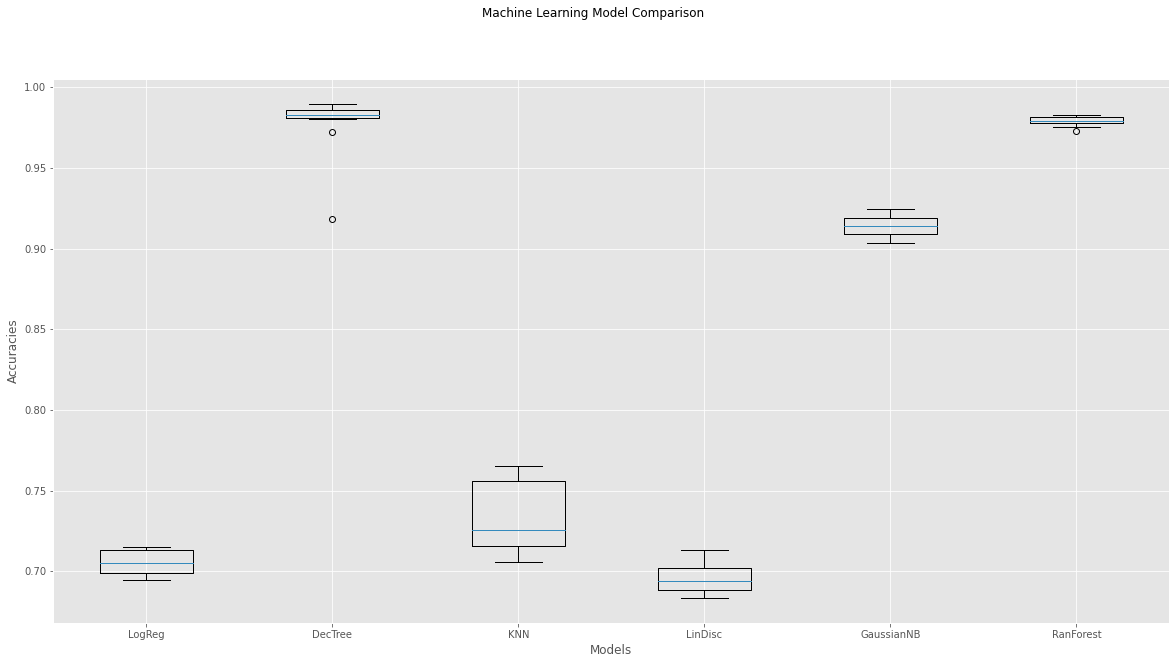

In [40]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [41]:
import numpy as nump

uniqueValues, occurCount = nump.unique(Y, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2 3 4 5 6 7 8 9]
Occurrence Count :  [  8779   8834   8366  15815   9609 190989   9180   5328   9210   8526]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(5, 10, 5, i, 'neural_net_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "neural_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_38 (Dense)             (None, 10)                60        
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________
Model: "neural_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_41 (Dense)             (None, 10)                60        
Total params: 120
Trainable params: 

In [74]:
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [75]:
from tensorflow.keras.callbacks import TensorBoard
warnings.simplefilter(action='ignore', category=FutureWarning)
history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=1502,
                                 epochs=175,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    import numpy as np
    pred=model.predict(X_test)
    pred_digits=np.argmax(pred,axis=1)
    y_train_ad = np.argmax(Y_train, axis=1)
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, pred.round()))
    
    history_dict[model.name] = [history_callback, model]

Model name: neural_net_1
Test loss: 0.6119754314422607
Test accuracy: 0.7655447721481323
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2638
           1       0.83      1.00      0.91      2593
           2       0.00      0.00      0.00      2555
           3       0.00      0.00      0.00      4698
           4       0.90      1.00      0.94      2817
           5       0.82      0.92      0.86     57381
           6       0.00      0.00      0.00      2808
           7       0.00      0.00      0.00      1596
           8       0.85      1.00      0.92      2795
           9       0.17      0.10      0.12      2510

   micro avg       0.81      0.74      0.77     82391
   macro avg       0.36      0.40      0.38     82391
weighted avg       0.66      0.74      0.70     82391
 samples avg       0.74      0.74      0.74     82391

Model name: neural_net_2
Test loss: 0.5283172726631165
Test accuracy: 0.7899163961410522
         

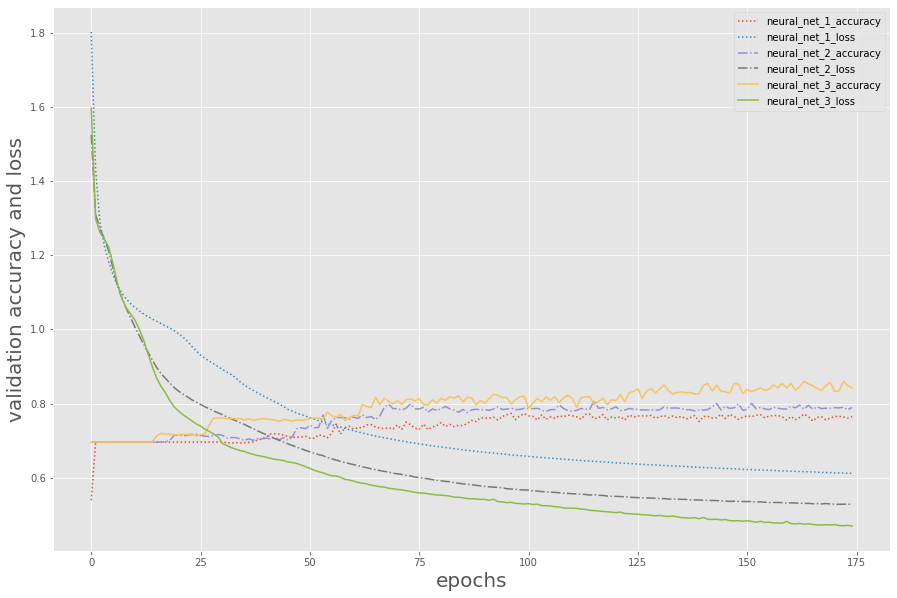

In [86]:
fig, (ax1) = plt.subplots(1, figsize=(15, 10))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "neural_net_1"):
        ax1.plot(val_acc, label="neural_net_1_accuracy", linestyle='dotted')
        ax1.plot(val_loss, label="neural_net_1_loss", linestyle='dotted')
    if(model_name in "neural_net_2"):
        ax1.plot(val_acc, label="neural_net_2_accuracy", linestyle='-.')
        ax1.plot(val_loss, label="neural_net_2_loss", linestyle='-.')
    if(model_name in "neural_net_3"):
        ax1.plot(val_acc, label="neural_net_3_accuracy", linestyle='solid')
        ax1.plot(val_loss, label="neural_net_3_loss", linestyle='solid')
    
ax1.set_ylabel('validation accuracy and loss', fontsize=20)
ax1.set_xlabel('epochs', fontsize=20)
ax1.legend()
plt.show()

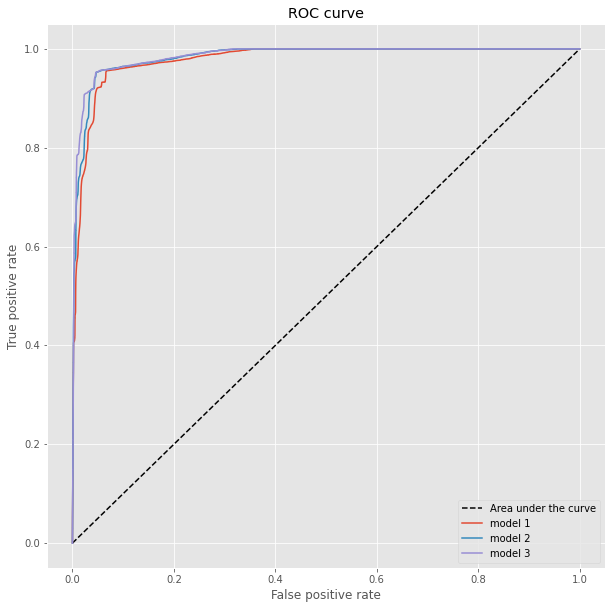

In [91]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(['Area under the curve', 'model 1', 'model 2', 'model 3']);

In [92]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(5, 10, 5, 10)

estimator = KerasClassifier(build_fn=create_model, epochs=175, batch_size=1502, verbose=0)
scores = cross_val_score(estimator, X_train, Y_train, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.80 (+/- 0.07)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation;
import numpy
import tensorflow
tensorflow.keras.backend.set_floatx('float64')
numpy.random.seed(7)

model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
ann = model.fit(X_train, Y_train, epochs=175, batch_size=1502)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/175
128/128 [==============================] - 1s 4ms/step - loss: 2.1823 - accuracy: 0.2495
Epoch 2/175
128/128 [==============================] - 0s 4ms/step - loss: 1.5479 - accuracy: 0.6758
Epoch 3/175
128/128 [==============================] - 0s 4ms/step - loss: 1.3035 - accuracy: 0.6950
Epoch 4/175
128/128 [==============================] - 0s 4ms/step - loss: 1.2140 - accuracy: 0.6950
Epoch 5/175
128/128 [==============================] - 0s 4ms/step - loss: 1.1643 - accuracy: 0.6950
Epoch 6/175
128/128 [==============================] - 0s 4ms/step - loss: 1.1258 - accuracy: 0.6950
Epoch 7/175
128/128 [==============================] - 0s 4ms/step - loss: 1.0959 - accuracy: 0.6950
Epoch 8/175
128/128 [==============================] - 0s 4ms/step - loss: 1.0749 - accuracy: 0.6950
Epoch 9/175
128/128 [==============================] - 0s 4ms/step - loss: 1.0591 - accuracy: 0.6950
Epoch 10/175
128/128 [==============================] - 0s 4ms/step - loss: 1.0444 - accura

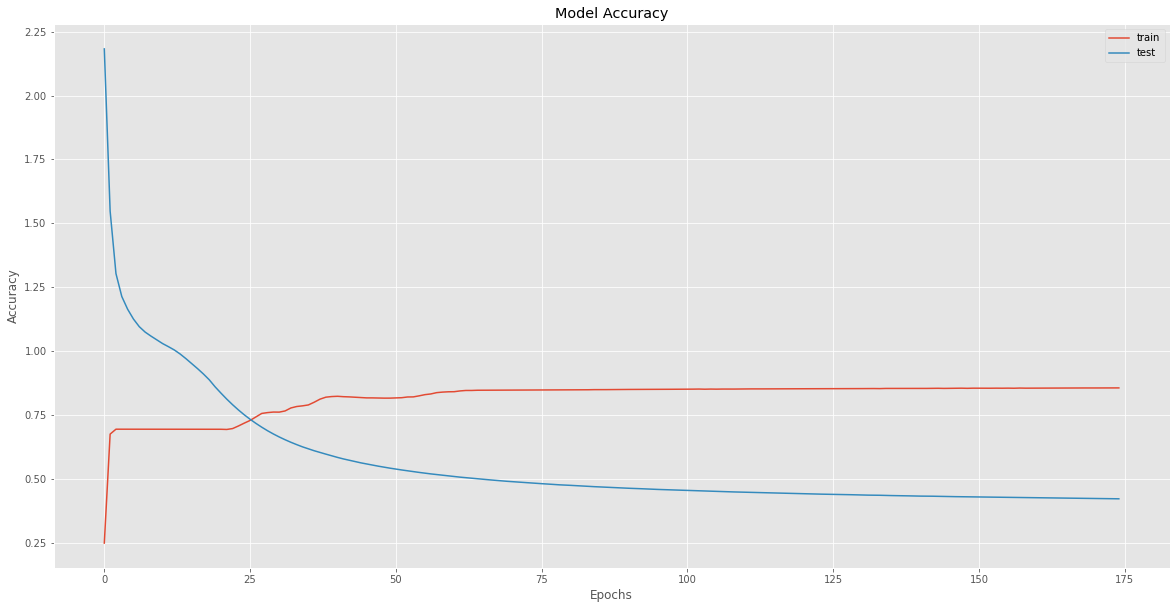

In [96]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [95]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
y_train_ad = np.argmax(Y_train, axis=1)
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.89      1.00      0.94      2593
           2       0.00      0.00      0.00      2555
           3       0.00      0.00      0.00      4698
           4       0.87      1.00      0.93      2817
           5       0.87      0.94      0.90     57381
           6       0.87      1.00      0.93      2808
           7       0.00      0.00      0.00      1596
           8       0.87      1.00      0.93      2795
           9       0.65      1.00      0.79      2510

   micro avg       0.86      0.85      0.86     82391
   macro avg       0.59      0.69      0.64     82391
weighted avg       0.77      0.85      0.81     82391
 samples avg       0.85      0.85      0.85     82391

